In [1]:
import sys
sys.path.append('/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc')

In [2]:
import torch
import numpy as np

import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

from IPython.display import HTML

from project_ssms.plot_utils import plot_2_mice, plot_4_traces
import joblib

In [5]:
trajs = joblib.load("trajs_all")

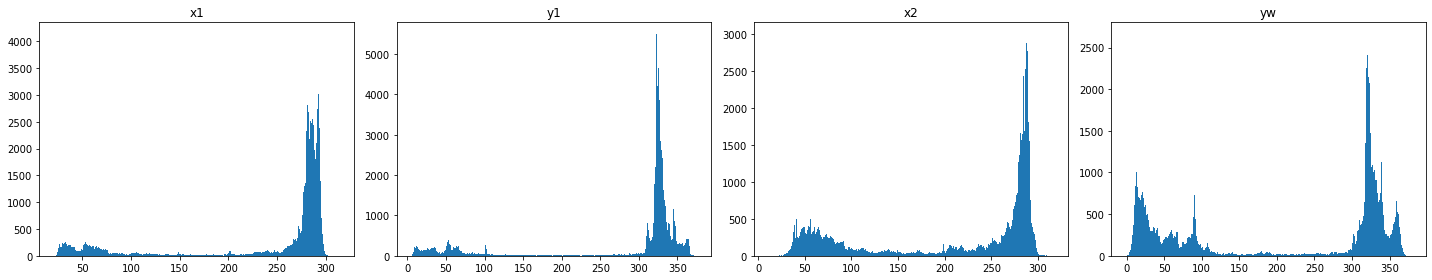

In [6]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.hist(trajs[:,0], bins=5000);
plt.title("x1")
plt.subplot(1, 4, 2)
plt.hist(trajs[:,1], bins=5000);
plt.title("y1")
plt.subplot(1, 4, 3)
plt.hist(trajs[:,2], bins=5000);
plt.title("x2")
plt.subplot(1, 4, 4)
plt.hist(trajs[:,3], bins=5000);
plt.title("yw")

plt.tight_layout()

In [7]:
np.min(trajs, axis=0)

array([20.68859416,  4.78160906, 10.99923861, -1.43330193])

In [8]:
np.max(trajs, axis=0)

array([314.26579452, 374.9678278 , 317.12118077, 379.03557754])

In [9]:
arena_xmin = 0
arena_xmax = 330

arena_ymin = -10
arena_ymax = 390

In [10]:
# make 3 by 3 grid world
x_grid_gap = (arena_xmax - arena_xmin) / 3
y_grid_gap = (arena_ymax - arena_ymin) / 3

In [11]:
x_grids = [arena_xmin + i * x_grid_gap for i in range(4)]

In [12]:
x_grids

[0.0, 110.0, 220.0, 330.0]

In [13]:
y_grids = [arena_ymin + i * y_grid_gap for i in range(4)]

In [14]:
y_grids

[-10.0, 123.33333333333334, 256.6666666666667, 390.0]

In [15]:
data_grids = []

for i in range(3):
    for j in range(3):
        cond_x = (x_grids[i] < trajs[:,0]) & (trajs[:,0] <= x_grids[i+1])
        cond_y = (y_grids[j] < trajs[:,1]) & (trajs[:,1] <= y_grids[j+1])
        out = trajs[cond_x & cond_y]
        data_grids.append(out)

In [16]:
data_grids[0].shape

(64529, 4)

In [17]:
data_grids[1].shape

(13708, 4)

In [18]:
sum([data_grid.shape[0] for data_grid in data_grids])

1080000

In [19]:
[data_grid.shape[0]/1080000 for data_grid in data_grids]

[0.05974907407407407,
 0.012692592592592592,
 0.08164074074074074,
 0.020737037037037036,
 0.003160185185185185,
 0.019519444444444443,
 0.088275,
 0.008485185185185186,
 0.7057407407407408]

In [20]:
"""
for i in range(3):
    for j in range(3):
        print("{} < x < {}".format(x_grids[i], x_grids[i+1]))
        print("{} < y < {}".format(y_grids[j], y_grids[j+1]))
        print("")
"""

'\nfor i in range(3):\n    for j in range(3):\n        print("{} < x < {}".format(x_grids[i], x_grids[i+1]))\n        print("{} < y < {}".format(y_grids[j], y_grids[j+1]))\n        print("")\n'

In [21]:
data_grids_mother = []

for i in range(3):
    for j in range(3):
        cond_x = (x_grids[i] < trajs[:,2]) & (trajs[:,2] <= x_grids[i+1])
        cond_y = (y_grids[j] < trajs[:,3]) & (trajs[:,3] <= y_grids[j+1])
        out = trajs[cond_x & cond_y]
        data_grids_mother.append(out)

In [22]:
sum([data_grid.shape[0] for data_grid in data_grids_mother])

1080000

In [23]:
[data_grid.shape[0]/1080000 for data_grid in data_grids_mother]

[0.1670898148148148,
 0.01725740740740741,
 0.09062685185185185,
 0.0797787037037037,
 0.0059722222222222225,
 0.018664814814814815,
 0.15623518518518517,
 0.013017592592592593,
 0.45135740740740743]

want consecutive segments, and training in batches

9 grids, each is a list of data.

In [24]:
trajs.shape

(1080000, 4)

In [25]:
traj_for_plot = trajs[:3600]

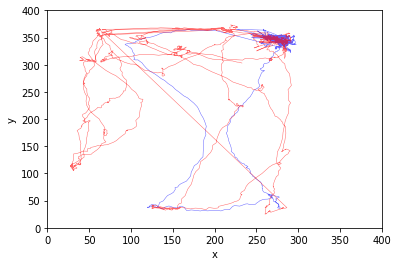

In [26]:
fig = plt.figure()
ax1 = plt.axes(xlim=(0, 400), ylim=(0,400))
#line, = ax1.plot([], [], lw=0.5)
plt.xlabel('x')
plt.ylabel('y')

plotlays, plotcols = [2], ["blue","red"]
lines = []
for index in range(2):
    lobj = ax1.plot([],[],lw=0.5,color=plotcols[index], alpha=0.6)[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

x1,y1 = [],[]
x2,y2 = [],[]


frame_num = traj_for_plot.shape[0]


def animate(i):
    global x1, y1, x2, y2
    """
    if i % 2000 == 0:
        x1, y1 = [], []
        x2, y2 = [], []
    """
    
    x = traj_for_plot[i][0]
    y = traj_for_plot[i][1]
    x1.append(x)
    y1.append(y)
    
    x = traj_for_plot[i][2]
    y = traj_for_plot[i][3]
    x2.append(x)
    y2.append(y)

    xlist = [x1, x2]
    ylist = [y1, y2]

    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 
    
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim_groundtruth = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=5, blit=True)
HTML(anim_groundtruth.to_html5_video())

# try to fit the model to this clip

In [ ]:
# TODO: filter traj, set acc_factor to be larger, save data, run more Ks